In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 153s 1us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
#reshaping by flattening to go from 2-d to1-d arr
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
#defining the classes
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:
classes[9]

'truck'

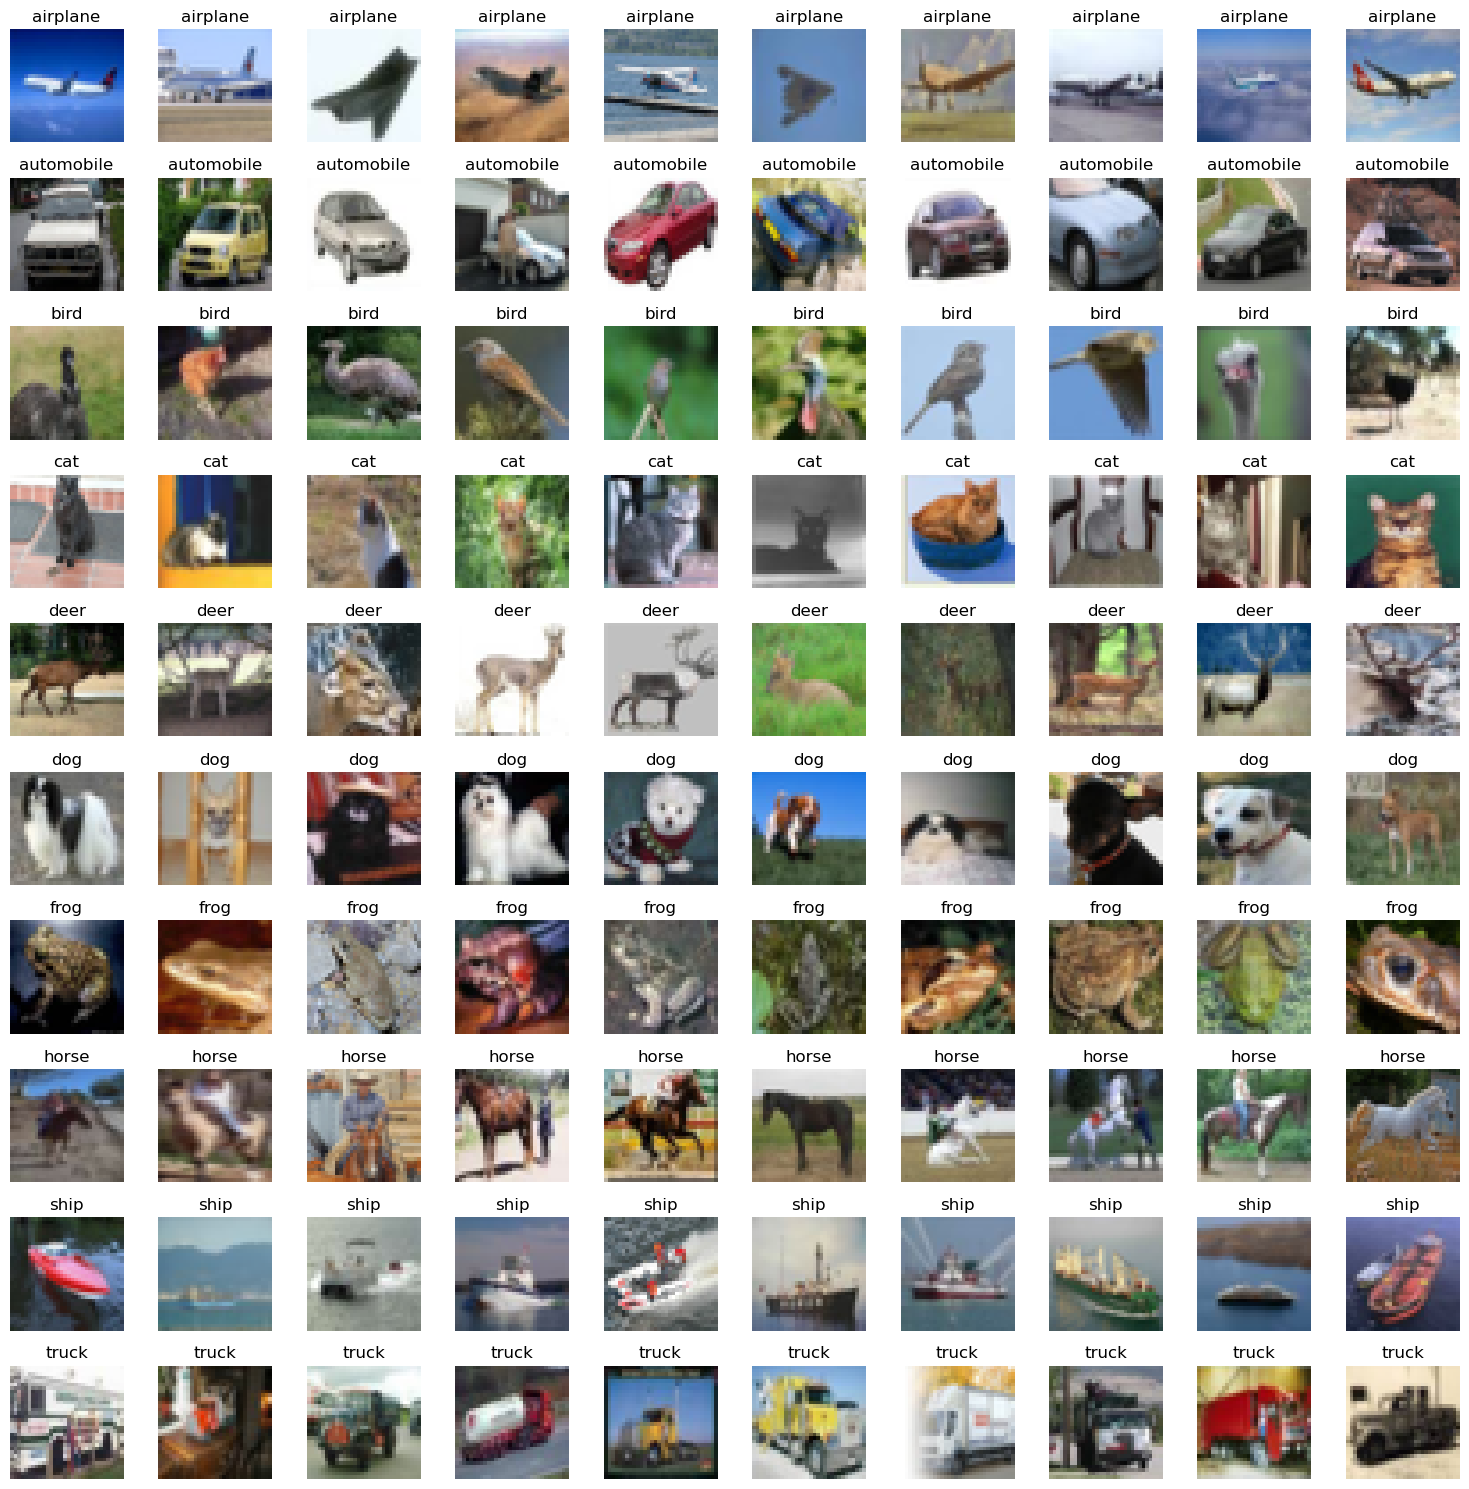

In [36]:
# Function to display random images from each class
def display_random_images_per_class(images, labels, classes, num_samples=10):
    fig, axs = plt.subplots(len(classes), num_samples, figsize=(15, 15))

    for i, class_name in enumerate(classes):
        class_indices = np.where(labels == i)[0]
        random_indices = np.random.choice(class_indices, num_samples, replace=False)
        
        for j, idx in enumerate(random_indices):
            axs[i, j].imshow(images[idx])
            axs[i, j].set_title(class_name)
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# Display random images from each class
display_random_images_per_class(X_train, y_train, classes)

In [23]:
#function to plot image
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])
    #X_train[1] is a truck 0 is a frog up to 10 diff category

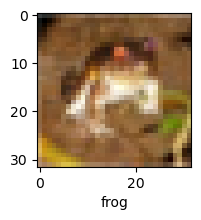

In [11]:
plot_sample(X_train, y_train, 0)

In [12]:
#normalising 
X_train = X_train/255
X_test = X_test/255

In [13]:
#defining and training an ann
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1000, activation='sigmoid'),
])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.2514 - loss: 2.2208
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.3930 - loss: 1.7251
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.4281 - loss: 1.6218
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.4555 - loss: 1.5421
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.4749 - loss: 1.4917


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.57      0.53      1000
           1       0.60      0.52      0.56      1000
           2       0.43      0.07      0.12      1000
           3       0.32      0.14      0.19      1000
           4       0.39      0.45      0.42      1000
           5       0.26      0.44      0.33      1000
           6       0.64      0.29      0.40      1000
           7       0.44      0.65      0.52      1000
           8       0.60      0.56      0.58      1000
           9       0.41      0.69      0.51      1000

    accuracy                           0.44     10000
   macro avg       0.46      0.44      0.42     10000
weighted avg       0.46      0.44      0.42     10000



In [15]:
#building a cnn
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3724 - loss: 1.7266
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.5966 - loss: 1.1438
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6586 - loss: 0.9819
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6912 - loss: 0.8910
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7187 - loss: 0.8185
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7365 - loss: 0.7612
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7526 - loss: 0.7106
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7738 - loss: 0.6500
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7874 - loss: 0.6101
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8042 - loss: 0.5686


In [18]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7115 - loss: 0.8846


[0.9025323987007141, 0.7091000080108643]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[2.01420480e-04, 5.10852306e-06, 3.14889912e-05, 1.82773337e-01,
        1.40499673e-04, 8.09077978e-01, 3.73525242e-03, 2.87245275e-05,
        3.94835230e-03, 5.77365536e-05],
       [4.33305651e-03, 1.77490450e-02, 5.89632876e-09, 4.05754141e-09,
        1.33463899e-07, 8.15767870e-11, 5.46670598e-10, 6.67754252e-09,
        9.77905571e-01, 1.21625653e-05],
       [3.89553905e-02, 4.08086061e-01, 4.87186277e-04, 9.79392091e-04,
        8.14238330e-04, 1.19985896e-04, 3.16233672e-05, 2.31922162e-03,
        5.40929794e-01, 7.27707520e-03],
       [9.66060877e-01, 1.29245035e-02, 1.60936045e-03, 9.13784839e-04,
        2.16869215e-04, 1.09810999e-05, 6.25231187e-04, 6.81785741e-06,
        1.74122006e-02, 2.19289417e-04],
       [5.61413458e-07, 1.94459557e-04, 1.60723161e-02, 1.13965221e-01,
        5.50032675e-01, 9.80913267e-03, 3.09918284e-01, 4.69786755e-07,
        5.85887301e-06, 9.50762683e-07]], dtype=float32)

In [20]:
#finding class with highest prob for each sample image 
y_classes = [np.argmax(element) for element in y_pred]
#displaying 1st 5
y_classes[:5]

[5, 8, 8, 0, 4]

In [28]:
#testing performance
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

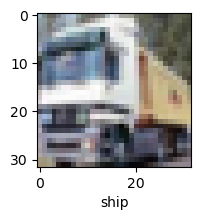

In [30]:
plot_sample(X_test, y_test,1)

In [31]:
classes[y_classes[1]]

'ship'

In [27]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.81      0.73      1000
           1       0.83      0.81      0.82      1000
           2       0.69      0.51      0.59      1000
           3       0.56      0.45      0.50      1000
           4       0.64      0.71      0.67      1000
           5       0.59      0.63      0.61      1000
           6       0.79      0.80      0.79      1000
           7       0.74      0.74      0.74      1000
           8       0.81      0.80      0.81      1000
           9       0.76      0.81      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

